Relevant Charts

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


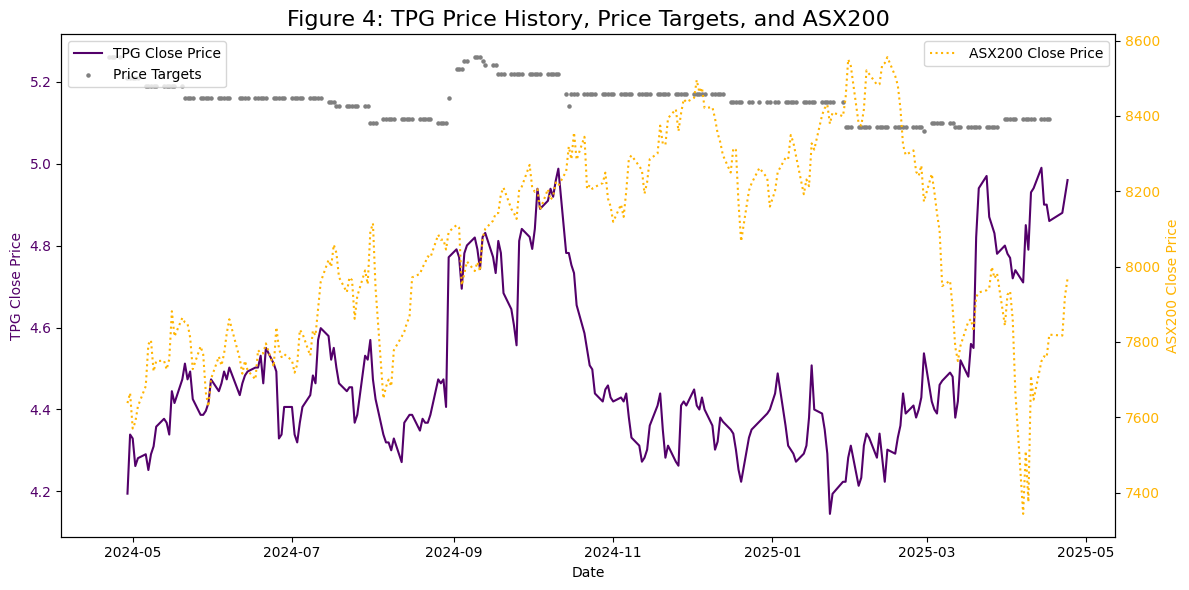

[*********************100%***********************]  1 of 1 completed


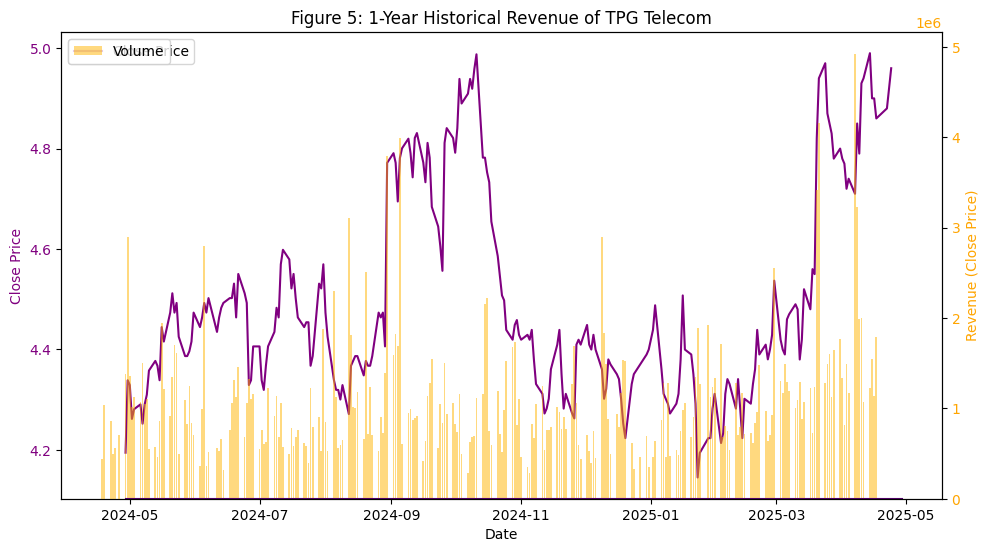

In [4]:
#Install and import necessary Python libraries
!python3 -m pip install yfinance
!python3 -m pip install xlrd
!python3 -m pip install openpyxl
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Combined Graph: TPG Price History, Price Targets, and ASX200

# Create a figure and axis for the first y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))
# Fetch TPG stock data
tpg = yf.download('TPG.AX', start='2024-04-28', end='2025-04-28')

# Fetch ASX200 index data
asx200 = yf.download('^AXJO', start='2024-04-28', end='2025-04-28')

# Load price targets from the Historical_Price_Targets.csv file
price_targets = pd.read_csv('Historical_Price_Targets.csv')
price_targets['Date'] = pd.to_datetime(price_targets['Date'])
price_targets.set_index('Date', inplace=True)

# Plot the TPG Close Price as a line graph
ax1.plot(tpg.index, tpg['Close'], color='#53006A', label='TPG Close Price')
ax1.set_xlabel('Date')  # Set x-axis label
ax1.set_ylabel('TPG Close Price', color='#53006A')  # Set y-axis label for the first axis
ax1.tick_params(axis='y', labelcolor='#53006A')  # Set tick parameters for the first axis

# Plot the Price Targets as black dots
ax1.scatter(price_targets.index, price_targets['Price Target'], color='grey', label='Price Targets', zorder=5, s=5)

# Create a second y-axis for the ASX200
ax2 = ax1.twinx()
ax2.plot(asx200.index, asx200['Close'], color='#FFB401', linestyle='dotted', label='ASX200 Close Price')
ax2.set_ylabel('ASX200 Close Price', color='#FFB401')  # Set y-axis label for the second axis
ax2.tick_params(axis='y', labelcolor='#FFB401')  # Set tick parameters for the second axis

# Add a title and legends
plt.title('Figure 4: TPG Price History, Price Targets, and ASX200', fontsize=16)
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save the combined graph
plt.savefig('combined_graph_tpg_asx200.png', bbox_inches='tight')
plt.show()

#Extra Graph for Cover Sheet: TPG Share Price and Volume (not required in the orginal task sheet)

# Load the TPG share price data from the Excel file
tpg_data = pd.read_excel('TPGsharepricedata.xls', sheet_name=0)

# Ensure the 'Date' column is in datetime format
tpg_data['Date'] = pd.to_datetime(tpg_data['Date'])

# Set the 'Date' column as the index
tpg_data.set_index('Date', inplace=True)

# Display the graph
plt.show()
fig, ax1 = plt.subplots(figsize=(10, 6))  # Create a figure and axis for the first y-axis
ax1.plot(tpg.index, tpg['Close'], color='purple', label='Close Price')  # Plot the Close Price
ax1.set_xlabel('Date')  # Set x-axis label
ax1.set_ylabel('Close Price', color='purple')  # Set y-axis label for the first axis
ax1.tick_params(axis='y', labelcolor='purple')  # Set tick parameters for the first axis

# Create a second y-axis for the volume
ax2 = ax1.twinx()
ax2.bar(tpg_data.index, tpg_data['Volume'], color='#FFB401', alpha=0.5, label='Volume')
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title and legend
plt.title('Figure 1: TPG Share Price and Volume', y=-0.2)
fig.tight_layout()
# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save the updated graph
plt.savefig('TPG share price and volume.png', bbox_inches='tight')

# Additional Graph: TPG Revenues Chart

# Fetch 1-year historical data for TPG Telecom (ASX:TPG) from Yahoo Finance
tpg_ticker = "TPG.AX"
tpg_data = yf.download(tpg_ticker, period="1y")

# Extract the 'Close' prices and plot them as a line graph
plt.title("Figure 5: 1-Year Historical Revenue of TPG Telecom")
plt.xlabel("Date")
plt.ylabel("Revenue (Close Price)")
plt.legend()
plt.plot(tpg_data.index, tpg_data['Close'], label="TPG Telecom Revenue", color="#53006A")
plt.savefig("tpg_telecom_revenue.png")
plt.grid(False)

Financial Ratios API

In [ ]:
#Install and import necessary Python libraries 
!python3 -m pip install yfinance
import yfinance as yf
import financeapi as fapi #This extracts ratio formula from the financeapi.py file 

# API inputs for ticker
TICKER = input('Enter a stock ticker (TPG.AX): ').upper()

try: # Get stock information
    stock = yf.Ticker(TICKER)
    stock_prices = stock.history(period="10y")
    stock_info = stock.info
    stock_financials = stock.financials
    stock_balance_sheet = stock.balance_sheet

    # Relevant information for ratios
    last_price = stock_prices['Close'].iloc[-1]
    earnings = stock_financials.loc["Net Income"].iloc[0]
    ebit = stock_financials.loc["EBIT"].iloc[0]
    ebitda = stock_financials.loc["EBITDA"].iloc[0]
    ev = stock_financials.loc["Minority Interests"].iloc[0] + stock_balance_sheet.loc["Net Debt"].iloc[0] 
    + stock_balance_sheet.loc["Total Capitalization"].iloc[0] - stock_balance_sheet.loc["Cash And Cash Equivalents"].iloc[0]
    dividend = stock_info['lastDividendValue']
    shares_outstanding = stock_info['sharesOutstanding']
    total_assets = (stock_balance_sheet.loc["Total Assets"].iloc[0] + stock_balance_sheet.loc["Total Assets"].iloc[1]) / 2
    total_equity = (stock_balance_sheet.loc["Stockholders Equity"].iloc[0] + stock_balance_sheet.loc["Stockholders Equity"].iloc[1]) / 2
    total_debt = (stock_balance_sheet.loc["Total Debt"].iloc[0] + stock_balance_sheet.loc["Total Debt"].iloc[1]) / 2
    total_revenue = stock_financials.loc["Total Revenue"].iloc[0]
    current_assets = stock_balance_sheet.loc["Current Assets"].iloc[0]
    current_liabilities = stock_balance_sheet.loc["Current Liabilities"].iloc[0]
    interest_expense = stock_financials.loc["Interest Expense"].iloc[0]
    inventory = stock_balance_sheet.loc["Inventory"].iloc[0]

    #Profitability Ratios
    roa = fapi.roa(earnings, total_assets) * 100
    roe = fapi.roe(earnings, total_equity) * 100
    net_margin = fapi.net_margin(earnings, total_revenue)

    #Efficiency Ratios
    asset_turnover = fapi.asset_turnover(total_assets, total_revenue)
    inventory_turnover = fapi.inventory_turnover(inventory, total_revenue)
    
    #Liquidity Ratios
    current_ratio = fapi.current_ratio(current_assets, current_liabilities)
    quick_ratio = fapi.quick_ratio(current_assets, current_liabilities, inventory)
    
    #Solvency Ratios
    de_ratio = fapi.de_ratio(total_debt, total_equity)
    interest_coverage_ratio = fapi.interest_coverage_ratio(ebit, interest_expense)

    #Market Value Ratios
    ev_ebitda = fapi.ev_ebitda(ev, ebitda)
    dy = fapi.dividend_yield(dividend, last_price) * 100
    eps = fapi.eps(earnings, shares_outstanding)
    pe_ratio = fapi.pe_ratio(last_price, eps)

except Exception as e:
    print(f"Error: {e}")

#Formatting code for negative signs 
sign = "-" if eps < 0 else ""

print(f"Chosen Stock: {TICKER} \nLast Share Price: {last_price:.2f} \nPE Ratio: {pe_ratio:.2f}")
print(f"Dividend Yield: {dy:.2f}% \nEPS: {sign}${abs(eps):.2f} \nROA: {roa:.2f}% \nROE: {roe:.2f}% \nCurrent Ratio: {current_ratio:.2f}")
print(f"DE Ratio: {de_ratio:.2f} \nQuick Ratio: {quick_ratio:.2f} \nInterest Coverage Ratio: {interest_coverage_ratio:.2f}")
print(f"Net Margin: {(net_margin):.2f}% \nAsset Turnover: {asset_turnover:.2f} \nInventory Turnover: {inventory_turnover:.2f}")

# Manually written these ratios into a paragraph in financialratios.txt file to arrange neatly into PDF file

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Chosen Stock: TPG.AX 
Last Share Price: 5.04 
PE Ratio: -87.58
Dividend Yield: 1.79% 
EPS: -$0.06 
ROA: -0.55% 
ROE: -0.94% 
Current Ratio: 0.72
DE Ratio: 0.55 
Quick Ratio: 0.67 
Interest Coverage Ratio: -24.17
Net Margin: -0.02% 
Asset Turnover: 3.51 
Inventory Turnover: 0.01


News API

In [2]:
# Install and import News API and other necessary Python librarires
!python3 -m pip install newsapi-python
!python3 -m pip install key
!python3 -m pip install requests
!python3 -m pip install bs4
!python3 -m pip install transformers
from newsapi import NewsApiClient
from key import my_api_key
import datetime as dt
import pandas as pd
import requests
from bs4 import BeautifulSoup
from transformers import pipeline

# Remove character limit for data frames
pd.set_option('display.max_colwidth', None)

# Link API to API key and define as a variable
newsapi = NewsApiClient(api_key = my_api_key)

# Generate recent news articles in English regarding "TPG Telecom"
data = newsapi.get_everything(q='TPG Telecom', language = 'en')

# Define a variable for the generated articles
articles = data['articles']

# Format and number collected articles
for x,y in enumerate(articles):
    print(f'{x} {y["title"]}') 
for key, value in articles[0].items():
    print(f"\n{key.ljust(15)}{value}")

# Create a data frame for the articles
df = pd.DataFrame(articles)

# Remove all information except for url to articles
website_links = df['url']

# Set up AI text summarisation model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Define a function which applies the summarisation model to url inputs
def summarise_url(url):
    try:
        response = requests.get(url, timeout=5)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        title = soup.title.string if soup.title else 'No Title'
        para = soup.find_all('p')
        text = ''.join(p.get_text() for p in para)

        text = text[:3000]

        summary = summarizer(text, max_length=130, min_length=30, do_sample=False)
        return summary[0]['summary_text']

    except Exception as e:
        return f"Error summarisng: {e}"
    
# Apply the summarisation function to the series containing the links to articles
website_links['summary'] = df['url'].apply(summarise_url)

# Define the summary of links
TPG_summary = website_links['summary']

# As some news cites are whitelisted from news APIs (CNN), create a variable containing the keywords 'Error' and 'CNN' so they can be removed
keywords = ['Error', 'CNN']

# Refine the series of summaries to remove any summaries which have errors or are by CNN
refined_summary = TPG_summary[~TPG_summary.astype(str).apply(
    lambda x: any(kw in x for kw in keywords)
)]

# Redefine the series so there are no spaces in the data frame
refined_summary = refined_summary.loc[[2,4,9,14]]

# Rewrite the series so that they are in the same cell but separated by paragraphs
refined_summary = "\n\n".join(TPG_summary.loc[[2,4,9,14]])

# Filter out any characters that are not readable
TPG_summary_text = refined_summary.encode('latin-1', 'ignore').decode('latin-1')

# Create a txt document in the with the final recent news summaries
file_path = "TPG_summary_text.txt"
with open(file_path, 'w') as file:
    file.write(TPG_summary_text)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
0 DDoS Mitigation Leak
1 Inaki Berroeta Buys 335,102 Shares of TPG Telecom Limited (ASX:TPG) Stock
2 In Memoriam: The 31 Billionaires Who Died Over The Past Year
3 Singapore Telecoms Industry Report 2025, with Detailed Operator Profiles and Forecasts for Singtel, Starhub, M1 and Simba
4 Should I buy Brickworks or Soul Patts shares?
5 If I could only own 1 ASX stock, it would be this one
6 2 ASX shares I think are fantastic for beginners
7 Australia’s TPG yearns for the simple life
8 [NANOG] Weekly Global IPv4 Routing Table Report
9 [NANOG] Weekly Global IPv4 Routing Table Report
10 [NANOG] Weekly Global IPv4 Routing Table Report
11 China Mobile stakes a claim on HKBN
12 Satellite and 6G technology set to revolutionise emergency services

source         {'id': None, 'name': 'Kentik.com'}

author         None

title          DDoS Mitigation Leak

description    In this edition o

Device set to use cpu
Your max_length is set to 130, but your input_length is only 3. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)
Your max_length is set to 130, but your input_length is only 3. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)
Your max_length is set to 130, but your input_length is only 3. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)


KeyError: '[4, 9, 14] not in index'

Scraping Images 

In [ ]:
#Install and import necessary Python libraries
!python3 -m pip install beautifulsoup4 selenium pandas pyarrow Pillow requests cairosvg
import io, requests, cairosvg # Useful libraries 
from selenium import webdriver
from selenium.webdriver import ChromeOptions # Finds Chrome browser to scrap from
from bs4 import BeautifulSoup # Scraps Images/Tables
from PIL import Image # Imports image onto VSCode
from urllib.parse import urljoin # Useful to link cutoff URL pathways 

# Stops selenium from opening GUI 
options = ChromeOptions()
options.add_argument("--headless=new")
driver = webdriver.Chrome(options=options)

# Makes URL into text readable by Python
url = "https://www.tpgtelecom.com.au"
driver.get(url)
content = driver.page_source
soup = BeautifulSoup(content, "html.parser")
driver.quit()

# General definition to find images in URL
def gets_url(classes, location, source):
    results = []
    for a in soup.find_all(attrs={"class": classes}):
        name = a.find(location)
        if name not in results:
            results.append(name.get(source))
    return results
    
# Extract image into repository
if __name__ == "__main__":
    returned_results = gets_url("img-fit-size", "img", "src") # The exact place where the image is
    for b in returned_results:
        full_url = urljoin(url, b) # Image URL may not be linked to base URL
        response = requests.get(full_url) # Searches for images in URL section
        image_content = response.content
        content_type = response.headers.get("Content-Type", "")
        if content_type == "image/svg+xml": # Convert SVG to PNG if needed
            png_bytes = cairosvg.svg2png(bytestring=image_content)
            image = Image.open(io.BytesIO(png_bytes)).convert("RGB") 
        else: # For non-SVGs
            image = Image.open(io.BytesIO(image_content)).convert("RGB") 

        # Save the image 
        image.save("TPGCoverage.png", quality=80)


DCF Excel Export

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


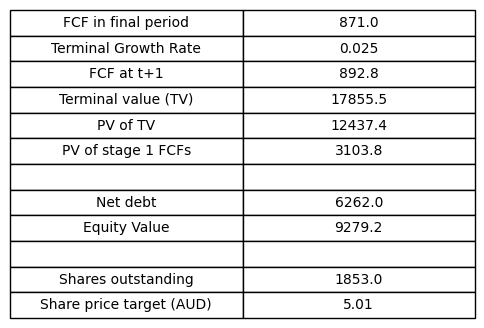

In [3]:
#Import necessary Python libraries
import pandas as pd
from matplotlib.table import Table
import matplotlib.pyplot as plt
!python3 -m pip install openpyxl

# Load the Excel file
file_path = 'DCF.xlsx'

# Extract the required data
# Load the specific sheet 'Sheet2' from the Excel file
df = pd.read_excel(file_path, sheet_name='Sheet2', header=None)

data = [
    [df.iloc[9, 0], df.iloc[9, 1]],
    [df.iloc[10, 0], df.iloc[10, 1]],
    [df.iloc[11, 0], df.iloc[11, 1]],
    [df.iloc[12, 0], df.iloc[12, 1]],
    [df.iloc[13, 0], df.iloc[13, 1]],
    [df.iloc[14, 0], df.iloc[14, 1]],
    ["", ""],  # Blank row
    [df.iloc[18, 0], df.iloc[18, 1]],
    [df.iloc[19, 0], df.iloc[19, 1]],
    ["", ""],  # Blank row
    [df.iloc[22, 0], df.iloc[22, 1]],
    [df.iloc[23, 0], df.iloc[23, 1]],
]

# Create a figure for the table
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('tight')
ax.axis('off')

# Create the table
table = Table(ax, bbox=[0, 0, 1, 1])
n_rows = len(data)
n_cols = 2

# Add cells to the table
for i, row in enumerate(data):
    for j, cell in enumerate(row):
        table.add_cell(i, j, width=1/n_cols, height=1/n_rows, text=cell, loc='center')

ax.add_table(table)

# Save the table as an image
plt.savefig('dcf_output.png', dpi=300, bbox_inches='tight')
# Extract the required data from the available DataFrame
data = [
    [df.iloc[0, 0], df.iloc[0, 1]],
    [df.iloc[1, 0], df.iloc[1, 1]],
    [df.iloc[2, 0], df.iloc[2, 1]],
    [df.iloc[3, 0], df.iloc[3, 1]],
    [df.iloc[4, 0], df.iloc[4, 1]],
]

# Create a figure for the table
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('tight')
ax.axis('off')

# Create the table
table = Table(ax, bbox=[0, 0, 1, 1])
n_rows = len(data)
n_cols = 2

# Add cells to the table
for i, row in enumerate(data):
    for j, cell in enumerate(row):
        table.add_cell(i, j, width=1/n_cols, height=1/n_rows, text=cell, loc='center')

ax.add_table(table)

plt.close()

Create PDF

In [ ]:
#Please install PDF viewer off VSCode extensions.

#Installing and importing Python PDF API and Openpyxl
!python3 -m pip install openpyxl
!python3 -m pip install fpdf
from fpdf import FPDF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Create a PDF object
pdf = FPDF(orientation='P', unit='mm', format='A4')
# Add a page
pdf.add_page() #adding page

# Set font
pdf.set_font('Arial', 'B', 16)

# Page design - Purple Line
# Add a left border filled with the hue #53006A
pdf.set_fill_color(83, 0, 106)  # Set fill color to #53006A
# Add the purple left border
pdf.rect(x=0, y=0, w=5, h=297, style='F')  # Draw the purple rectangle (A4 height is 297mm)  

# Page design - Yellow Line
# Add the yellow border next to the purple border
pdf.set_fill_color(255, 255, 0)  # Set fill color to yellow
pdf.set_fill_color(255, 180, 1)  # Set fill color to #FFB401
pdf.rect(x=5, y=0, w=2, h=297, style='F')  # Draw the yellow rectangle

# Add a logo to the top right corner
pdf.image('TPG-logo.png', x=160, y=5, w=45)

# Add the title text
pdf.cell(40, 10, 'TPG Telecom Limited Equity Research Report')
pdf.ln(10)  # Line break

pdf.set_font('Arial', '', 12) #Set font to smaller size
pdf.cell(0, 10, "Authored by FINM3422 Group 11")

# Add "Company Overview" heading
pdf.set_xy(10, 30)  # Set position 10mm down from "Authored by FINM3422 Group 11"
pdf.set_font('Arial', 'B', 16)  # Set font to bold and size 16
pdf.cell(0, 10, 'Company Overview', align='L')

# Open and read the content of the companyoverview.txt file
with open('companyoverview.txt', 'r') as file:
    company_overview_text = file.read()

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Set position 10mm below the "Company Overview" heading
pdf.set_xy(10, current_y + 10) 

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Set font for the content
pdf.set_font('Arial', '', 10)

# Add the text with word wrapping to fit within 135mm width
pdf.multi_cell(135, 5, company_overview_text)

# Add the date
pdf.set_xy(0, 30)  # Set position
pdf.set_font('Arial', '', 12)
pdf.cell(0, 10, '16th April 2025', align='R')

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add "Initiation of Coverage"
pdf.set_xy(0, current_y + 10)
pdf.cell(0, 10, 'Initiation of Coverage', align='R')

# Add "HOLD" in larger font
pdf.set_xy(0, current_y + 20)
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'HOLD', align='R')

# Reduce font size to 12
pdf.set_font('Arial', '', 12)

# Add "ASX:TPG"
pdf.set_xy(0, current_y + 30)
pdf.cell(0, 10, 'ASX:TPG', align='R')

# Add "Price: $4.90"
pdf.set_xy(0, current_y + 40)
pdf.cell(0, 10, 'Price: $4.90', align='R')

# Add "Target Price: $X" in bold
pdf.set_xy(0, current_y + 50)
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, 'Target Price: $5.01', align='R')

# Add "Upside: X%"
pdf.set_xy(0, current_y + 60)
pdf.set_font('Arial', '', 12)
pdf.set_text_color(0, 128, 0)  # Set text colour to green
pdf.cell(0, 10, 'Upside: 2.2%', align='R')
pdf.set_text_color(0, 0, 0)  # Reset text colour to black

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Draw a line across starting from the right-hand side and ending in line with the start of "Initiation"
pdf.set_xy(0, current_y + 10)  # Set position for the line
pdf.set_draw_color(0, 0, 0)  # Set line color to black
pdf.line(150, 100, 200, 100)  # Draw the line with a length of 50, ending at the right

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add name "Niamh O'Sullivan" right-aligned
pdf.set_xy(0, current_y)
pdf.cell(0, 5, '', align='R')  # Add space after the line
pdf.cell(0, 10, "Niamh O'Sullivan", align='R')

# Add email "s4803078@student.uq.edu.au" in smaller font, right-aligned, 5mm below name
pdf.set_xy(0, current_y + 5)
pdf.set_font('Arial', '', 10)  # Set smaller font
pdf.cell(0, 10, "s4803078@student.uq.edu.au", align='R')

# Add name "Sarah Ott" right-aligned, 10mm below prior email
pdf.set_xy(0, current_y + 15)
pdf.set_font('Arial', '', 12)  # Reset font size
pdf.cell(0, 10, "Sarah Ott", align='R')

# Add email "s4803170@student.uq.edu.au" in smaller font, right-aligned, 5mm below name
pdf.set_xy(0, current_y + 20)
pdf.set_font('Arial', '', 10)  # Set smaller font
pdf.cell(0, 10, "s4803170@student.uq.edu.au", align='R')

# Add name "Minh Anh Nguyen" right-aligned, 10mm below prior email
pdf.set_xy(0, current_y + 30)
pdf.set_font('Arial', '', 12)  # Reset font size
pdf.cell(0, 10, "Minh Anh Nguyen", align='R')

# Add email "s4882466@student.uq.edu.au" in smaller font, right-aligned, 5mm below name
pdf.set_xy(0, current_y + 35)
pdf.set_font('Arial', '', 10)  # Set smaller font
pdf.cell(0, 10, "s4882466@student.uq.edu.au", align='R')

# Add name "Snigdh Jaiswal" right-aligned, 10mm below prior email
pdf.set_xy(0, current_y + 45)
pdf.set_font('Arial', '', 12)  # Reset font size
pdf.cell(0, 10, "Snigdh Jaiswal", align='R')

# Add email "s4882601@student.uq.edu.au" in smaller font, right-aligned, 5mm below name
pdf.set_xy(0, current_y + 50)
pdf.set_font('Arial', '', 10)  # Set smaller font
pdf.cell(0, 10, "s4882601@student.uq.edu.au", align='R')

# Draw a line across starting from the right-hand side and ending in line with the start of "Initiation"
pdf.set_xy(0, 100)  # Set position for the line
pdf.set_draw_color(0, 0, 0)  # Set line color to black
pdf.line(150, current_y + 10, 200, current_y + 10)  # Draw the line with a length of 50, ending at the right, positioned 10mm below the email "4882601@student.uq.edu.au"

# Add title for the section "Recent Transactions"
pdf.set_xy(150, 162)  # Position above the "EGW Asset Sale" image
pdf.set_font('Arial', 'B', 8)  # Set font to bold and size 8

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add a highlight background to the title
pdf.set_fill_color(211, 211, 211)  # Set fill color to light gray
pdf.rect(x=150, y=162, w=50, h=5, style='F')  # Draw the filled rectangle behind the title

# Set the title text color to black
pdf.set_text_color(0, 0, 0)

# Add the title "Recent Transactions" with word wrapping to fit within 50mm width
pdf.set_xy(150, current_y)  # Reset position to ensure text is on top of the rectangle
pdf.multi_cell(50, 5, 'Recent Transactions', align='L')

# Add title for the image "EGW Asset Sale"
pdf.set_xy(155, current_y + 3)  # Position above the image
pdf.set_font('Arial', 'BI', 8)  # Set font to bold and italic with size 8
pdf.cell(40, 10, 'EGW Asset Sale', align='C')

# Add the Vocus logo below the "EGW Asset Sale" heading
pdf.image('vocuslogo.png', x=160, y=current_y+8, w=30)

# Add title for the image "New Partnership"
pdf.set_xy(155, current_y + 18)  # Position above the image
pdf.set_font('Arial', 'BI', 8)  # Set font to bold and size 8
pdf.cell(40, 10, 'New Partnership', align='C')

# Add the Optus logo below the "New Partnership" heading
pdf.image('optus-logo.png', x=160, y=current_y + 23, w=30)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add "Recent Company Highlights" heading
pdf.set_xy(10, 65)  # Set position below the "Company Overview" section
pdf.set_font('Arial', 'B', 16)  # Set font to bold and size 16
pdf.cell(0, 10, 'Recent Company Highlights', align='L')

# Open and read the content of the frontheadlines.txt file
with open('frontheadlines.txt', 'r') as file:
    front_headlines_text = file.read()

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Set position 10mm below the "Recent Company Highlights" heading
pdf.set_xy(10, current_y + 10)  

# Set font for the content
pdf.set_font('Arial', '', 10)

# Add the text with word wrapping to fit within 135mm width
pdf.multi_cell(135, 5, front_headlines_text)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Open and read the content of the frontheadlines1.txt file
with open('frontheadlines1.txt', 'r') as file:
    front_headlines1_text = file.read()

# Set position below the "Recent Company Highlights" section
pdf.set_xy(10, current_y + 5)  # Adjust position as needed

# Set font for the content
pdf.set_font('Arial', '', 10)

# Add the text with word wrapping to fit within 135mm width
pdf.multi_cell(135, 5, front_headlines1_text)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Open and read the content of the frontheadlines3.txt file
with open('frontheadlines3.txt', 'r') as file:
    front_headlines3_text = file.read()

# Set position below the previous section
pdf.set_xy(10, current_y + 5)  # Adjust position as needed

# Set font for the content
pdf.set_font('Arial', '', 10)

# Add the text with word wrapping to fit within 135mm width
pdf.multi_cell(135, 5, front_headlines3_text)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Draw a black line 2mm below the current text position
pdf.set_draw_color(0, 0, 0)  # Set line color to black
pdf.line(10, current_y + 2, 200, current_y + 2)  # Draw the line with 10mm spacing on either side

# Add the graph "TPG share price and volume.png"
pdf.image('TPG share price and volume.png', x=30, y=205, w=130)
#Add a new page 
pdf.add_page()

# Add the logo to the new page
pdf.image('TPG-logo.png', x=160, y=5, w=45)

# Add the purple left border
pdf.set_fill_color(83, 0, 106)  # Set fill color to #53006A
pdf.rect(x=0, y=0, w=5, h=297, style='F')  # Draw the filled rectangle (A4 height is 297mm)

# Add the yellow border next to the purple border
pdf.set_fill_color(255, 180, 1)  # Set fill color to #FFB401
pdf.rect(x=5, y=0, w=2, h=297, style='F')  # Draw the yellow rectangle

# Add "Financial Ratios" title on the left-hand side
pdf.set_xy(10, 30)  # Set position on the left-hand side
pdf.set_font('Arial', 'B', 12)  # Set font to bold and size 12

# Add a highlight background to the title
pdf.set_fill_color(83, 0, 106)  # Set fill color to #53006A
pdf.rect(x=10, y=30, w=90, h=10, style='F')  # Draw the filled rectangle behind the title

# Set the title text color to white
pdf.set_text_color(255, 255, 255)

# Add the title with word wrapping to fit within 90mm width
pdf.set_xy(10, 30)  # Reset position to ensure text is on top of the rectangle
pdf.cell(90, 10, 'Financial Ratios', align='C', ln=True)

# Reset text color to black for subsequent content
pdf.set_text_color(0, 0, 0)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Open and read the content of the risks.txt file
with open('financialratios.txt', 'r') as file:
    financialratios_text = file.read()

# Set position below the "Financial Ratios" title
pdf.set_xy(10, current_y + 5)  # Adjust position as needed

# Set font for the content
pdf.set_font('Arial', '', 10)

# Add the text with word wrapping to fit within 90mm width
pdf.multi_cell(90, 5, financialratios_text)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add scraped image
pdf.image( 'TPGCoverage.png', x=10, y= current_y + 1, w = 80)
# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add "TPG Coverage Areas" title on the left-hand side
pdf.set_xy(10, current_y + 70)# Set position below the previous content
pdf.set_font('Arial', 'I', 10) # Set font to bold and size 10
pdf.cell(90, 10, 'Figure 2: TPG Coverage Areas', align='C', ln=True)


# Add "Investment Thesis and Valuation" title on the right-hand side
pdf.set_xy(110, 30)  # Set position on the right-hand side
pdf.set_font('Arial', 'B', 12)  # Set font to bold and size 12

#Add a highlight background to the title
pdf.set_fill_color(83, 0, 106)  # Set fill color to #53006A
pdf.rect(x=110, y=30, w=90, h=10, style='F')  # Draw the filled rectangle behind the title

# Set the title text color to white
pdf.set_text_color(255, 255, 255)

# Add the title with word wrapping to fit within 100mm width
pdf.set_xy(110, 30)  # Reset position to ensure text is on top of the rectangle
pdf.multi_cell(90, 10, 'Investment Thesis and Valuation', align='C')

# Reset text color to black for subsequent content
pdf.set_text_color(0, 0, 0)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add "Investment Thesis" title on the right-hand side
pdf.set_xy(110, current_y + 5)  # Set position below the "Investment Thesis and Valuation Summary" section
pdf.set_font('Arial', 'B', 10)  # Set font to bold and size 10

# Add a highlight background to the title
pdf.set_fill_color(211, 211, 211)  # Set fill color to light gray
pdf.rect(x=110, y=45, w=90, h=5, style='F')  # Draw the filled rectangle behind the title

# Add the title with word wrapping to fit within 90mm width
pdf.set_xy(110, 45)  # Reset position to ensure text is on top of the rectangle
pdf.multi_cell(90, 5, 'Investment Thesis', align='L')

# Open and read the content of the investmentthesis.txt file
with open('investmentthesis.txt', 'r') as file:
    investment_thesis_text = file.read()

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Set position below the "Investment Thesis and Valuation Summary" title
pdf.set_xy(110, current_y+ 5)  # Adjust position as needed

# Set font for the content
pdf.set_font('Arial', '', 10)

# Add the text with word wrapping to fit within 90mm width
pdf.multi_cell(90, 5, investment_thesis_text)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add "Valuation Summary" title on the right-hand side
pdf.set_xy(300, current_y + 5)  # Set position below the "Investment Thesis and Valuation Summary" section
pdf.set_font('Arial', 'B', 10)  # Set font to bold and size 10

# Add a highlight background to the title
pdf.set_fill_color(211, 211, 211)  # Set fill color to light gray
pdf.rect(x=110, y=150, w=90, h=5, style='F')  # Draw the filled rectangle behind the title

# Set the title text color to black
pdf.set_text_color(0, 0, 0)

# Add the title with word wrapping to fit within 90mm width
pdf.set_xy(110, 150)  # Reset position to ensure text is on top of the rectangle
pdf.multi_cell(90, 5, 'Valuation Summary', align='L')

# Open and read the content of the valuation.txt file
with open('valuation.txt', 'r') as file:
    valuation_text = file.read()

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Set position below the "Valuation Summary" title
pdf.set_xy(110, current_y + 5)  # Adjust position as needed

# Set font for the content
pdf.set_font('Arial', '', 10)

# Add the text with word wrapping to fit within 90mm width
pdf.multi_cell(90, 5, valuation_text)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add "DCF Output" title across the whole page
pdf.set_xy(10, current_y + 10)  # Set position for the title
pdf.set_font('Arial', 'B', 10)  # Set font to bold and size 12

# Add a highlight background to the title
pdf.set_fill_color(211, 211, 211)  # Set fill color to light gray
pdf.rect(x=10, y=200, w=190, h=5, style='F')  # Draw the filled rectangle across the page width

# Set the title text color to black
pdf.set_text_color(0, 0, 0)

# Add the title centered across the page
pdf.set_xy(10, 200)  # Reset position to ensure text is on top of the rectangle
pdf.cell(190, 5, 'DCF Output and Corresponding Football Field', align='C', ln=True)

# Add the DCF output image
pdf.image('dcf_output.png', x=10, y=210, w=80)


# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add title below the DCF output image on the left-hand side
pdf.set_xy(10, current_y +60) #Set position below the image
pdf.set_font('Arial', 'I', 10)  # Set font to bold and italic with size 10
pdf.cell(80, 10, 'Table 1: DCF Output', align='C', ln=True)

#Read DCF File cover page 
Football_Field = pd.read_excel('footallfield1.xlsx', sheet_name='Sheet1')

#Defining Variables
Valuation_Method = Football_Field['Valuation Method']
Min = Football_Field ['Min']
Difference = Football_Field ['Difference']
Max = Football_Field ['Max']

#Setup
Min_Dif=list(np.add(Min,Difference))

#Setting up chart
plt.axvline(x=5, color='black', linestyle='--', linewidth=1)  # Add a vertical dotted line at x=5
p1=plt.barh(Valuation_Method, Min, height=0.5, color='white')
p2=plt.barh(Valuation_Method, Difference, height=0.5, left=Min, color='purple')
p3=plt.barh(Valuation_Method, Max, height=0.5, left=Min_Dif, color='white')
plt.xlabel('Share Price (AUD)')
plt.ylabel('Valuation Method')
plt.bar_label(p1, labels=[f'{bar.get_width(): .1f}' for bar in p1], label_type='edge', fontsize=10, color='black', padding=-23)
plt.bar_label(p2, labels=[f'{bar.get_width(): .1f}' for bar in p3], label_type='edge', fontsize=10, color='black', padding=10)
plt.yticks(Valuation_Method, fontsize=10)
plt.xlim(3,7)
plt.savefig('Football_Field.png', dpi=300, bbox_inches='tight')


# Add the Football Field chart to the PDF and Label it
pdf.image('Football_Field.png', x=110, y= 210, w=90)
pdf.set_xy(110, 210)

# Add title below the Football Field chart
pdf.set_xy(110, 265) #Set position below the chart
pdf.set_font('Arial', 'I', 10)  # Set font to bold and italic with size 10
pdf.cell(90, 10, 'Figure 3: Football Field', align='C', ln=True)

# Add a new page
pdf.add_page()

# Add the logo to the new page
pdf.image('TPG-logo.png', x=160, y=5, w=45)

# Add the purple left border
pdf.set_fill_color(83, 0, 106)  # Set fill color to #53006A
pdf.rect(x=0, y=0, w=5, h=297, style='F')  # Draw the filled rectangle (A4 height is 297mm)

# Add the yellow border next to the purple border
pdf.set_fill_color(255, 180, 1)  # Set fill color to #FFB401
pdf.rect(x=5, y=0, w=2, h=297, style='F')  # Draw the yellow rectangle

# Add the logo to the top right corner
pdf.image('TPG-logo.png', x=160, y=5, w=45)

# Add "Risks" title on the left-hand side
pdf.set_xy(10, 30)  # Set position on the left-hand side
pdf.set_font('Arial', 'B', 12)  # Set font to bold and size 14

# Add a highlight background to the title
pdf.set_fill_color(83, 0, 106)  # Set fill color to #53006A
pdf.rect(x=10, y=30, w=90, h=10, style='F')  # Draw the filled rectangle behind the title

# Set the title text color to white
pdf.set_text_color(255, 255, 255)

# Add the title with word wrapping to fit within 90mm width
pdf.set_xy(10, 30)  # Reset position to ensure text is on top of the rectangle
pdf.cell(90, 10, 'Risks', align='C', ln=True)

# Reset text color to black for subsequent content
pdf.set_text_color(0, 0, 0)

# Add "Upside Risks" title on the left-hand side
pdf.set_xy(10, 60)  # Set position below the "Risks" section
pdf.set_font('Arial', 'B', 10)  # Set font to bold and size 10

# Add a highlight background to the title
pdf.set_fill_color(211, 211, 211)  # Set fill color to light gray
pdf.rect(x=10, y=60, w=90, h=5, style='F')  # Draw the filled rectangle behind the title

# Set the title text color to black
pdf.set_text_color(0, 0, 0)

# Add the title with word wrapping to fit within 90mm width
pdf.set_xy(10, 60)  # Reset position to ensure text is on top of the rectangle
pdf.cell(90, 5, 'Upside Risks', align='L', ln=True)

# Open and read the content of the risks.txt file
with open('risks.txt', 'r') as file:
    risks_text = file.read()

# Set position below the "Risks" title
pdf.set_xy(10, 43)  # Adjust position as needed

# Set font for the content
pdf.set_font('Arial', '', 10)

# Add the text with word wrapping to fit within 90mm width
pdf.multi_cell(90, 5, risks_text)

# Add "Downside Risks" title on the left-hand side
pdf.set_xy(110, 30)  # Set position on the left-hand side
pdf.set_font('Arial', 'B', 10)  # Set font to bold and size 10

# Add a highlight background to the title
pdf.set_fill_color(211, 211, 211)  # Set fill color to light gray
pdf.rect(x=110, y=30, w=90, h=5, style='F')  # Draw the filled rectangle behind the title

# Set the title text color to black
pdf.set_text_color(0, 0, 0)

# Add the title with word wrapping to fit within 90mm width
pdf.set_xy(110, 30)  # Reset position to ensure text is on top of the rectangle
pdf.cell(90, 5, 'Downside Risks', align='L', ln=True)

# Open and read the content of the risks.txt file
with open('risks1.txt', 'r') as file:
    risks_text = file.read()

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Set position below the "Downside risks" title
pdf.set_xy(110, current_y + 5)  # Adjust position as needed

# Set font for the content
pdf.set_font('Arial', '', 10)

# Add the text with word wrapping to fit within 90mm width
pdf.multi_cell(90, 5, risks_text)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add "Catalysts" title on the right-hand side
pdf.set_xy(110, current_y+ 10)  # Set position on the right-hand side
pdf.set_font('Arial', 'B', 12)  # Set font to bold and size 14

# Add a highlight background to the title
pdf.set_fill_color(83, 0, 106)  # Set fill color to #53006A
pdf.rect(x=110, y=110, w=90, h=10, style='F')  # Draw the filled rectangle behind the title

# Set the title text color to white
pdf.set_text_color(255, 255, 255)

# Add the title with word wrapping to fit within 90mm width
pdf.set_xy(110, 110)  # Reset position to ensure text is on top of the rectangle
pdf.cell(90, 10, 'Catalysts', align='C', ln=True)

# Reset text color to black for subsequent content
pdf.set_text_color(0, 0, 0)

# Open and read the content of the catalysts.txt file
with open('catalysts.txt', 'r') as file:
    catalysts_text = file.read()

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Set position below the "Catalysts" title
pdf.set_xy(110, current_y + 3)  # Adjust position as needed

# Set font for the content
pdf.set_font('Arial', '', 10)

# Add the text with word wrapping to fit within 90mm width
pdf.multi_cell(90, 5, catalysts_text)

#Add a new page to continue catalyst section
pdf.add_page()

# Add the purple left border
pdf.set_fill_color(83, 0, 106)  # Set fill color to #53006A
pdf.rect(x=0, y=0, w=5, h=297, style='F')  # Draw the filled rectangle (A4 height is 297mm)

# Add the yellow border next to the purple border
pdf.set_fill_color(255, 180, 1)  # Set fill color to #FFB401
pdf.rect(x=5, y=0, w=2, h=297, style='F')  # Draw the yellow rectangle

# Add the logo to the new page
pdf.image('TPG-logo.png', x=160, y=5, w=45)

# Open and read the content of the catalyst2.txt file
with open('catalysts2.txt', 'r') as file:
    catalysts_text = file.read()

# Set position below the "Risks" title
pdf.set_xy(10, 30)  # Adjust position as needed

# Set font for the content
pdf.set_font('Arial', '', 10)

# Add the text with word wrapping to fit within 90mm width
pdf.multi_cell(90, 5, catalysts_text)

# Set the title text color to white
pdf.set_text_color(255, 255, 255)

# Add "Relevant Graphs" title on the right-hand side
pdf.set_xy(110, 30)  # Set position on the right-hand side
pdf.set_font('Arial', 'B', 12)  # Set font to bold and size 12

# Add a highlight background to the title
pdf.set_fill_color(83, 0, 106)  # Set fill color to #53006A
pdf.rect(x=110, y=30, w=90, h=10, style='F')  # Draw the filled rectangle behind the title

# Set the title text color to white
pdf.set_text_color(255, 255, 255)

# Add the title with word wrapping to fit within 90mm width
pdf.set_xy(110, 30)  # Reset position to ensure text is on top of the rectangle
pdf.cell(90, 10, 'Relevant Graphs', align='C', ln=True)

# Reset text color to black for subsequent content
pdf.set_text_color(0, 0, 0)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Paste Graphs
pdf.image('combined_graph_tpg_asx200.png', x=110, y=current_y + 5, w=90)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Open and read the content of the relevantgraphs.txt file
with open('relevantgraphs.txt', 'r') as file:
    relevant_graphs_text = file.read()

# Add the text from relevantgraphs.txt below the graph
pdf.set_xy(110, current_y + 55)#Adjust the position below the graph
pdf.set_font('Arial', '', 10)
pdf.multi_cell(90, 5, relevant_graphs_text)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Paste Graphs
pdf.image('tpg_telecom_revenue.png', x=110, y=current_y + 1, w=90)

# Open and read the content of the revenue.txt file
with open('revenue.txt', 'r') as file:
    revenue_text = file.read()

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add the text from revenue.txt below the graph
pdf.set_xy(110, current_y + 50)  # Adjust position below the graph
pdf.set_font('Arial', '', 10)
pdf.multi_cell(90, 5, revenue_text)

# Add a new page for "About the Authors and Recent News"
pdf.add_page()

# Add the purple left border
pdf.set_fill_color(83, 0, 106)  # Set fill color to #53006A
pdf.rect(x=0, y=0, w=5, h=297, style='F')  # Draw the filled rectangle (A4 height is 297mm)

# Add the yellow border next to the purple border
pdf.set_fill_color(255, 180, 1)  # Set fill color to #FFB401
pdf.rect(x=5, y=0, w=2, h=297, style='F')  # Draw the yellow rectangle

# Add the logo to the top right corner
pdf.image('TPG-logo.png', x=160, y=5, w=45)

# Add the title "Recent News"
pdf.set_font('Arial', 'B', 16)
pdf.cell(40, 30, 'Recent news')
pdf.ln(10)  # Line break

# Read the created TPG Recent News (TPG _summary_text) that was created
with open("TPG_summary_text.txt", "r") as file:
    TPG_summary_text = file.read()

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Setting font and position of TPG Recent News
pdf.set_font("Arial", '',10)
pdf.set_text_color(0, 0, 0) 
pdf.set_xy(10, current_y + 10) 
# Replace unsupported characters with ASCII equivalents
TPG_summary_text = TPG_summary_text.replace('’', "'").replace('“', '"').replace('”', '"')

# Add the text with word wrapping to fit page
pdf.multi_cell(0, 5, TPG_summary_text)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add "About the Authors" title halfway down the page
pdf.set_xy(10, current_y + 10) 
pdf.set_font('Arial', 'B', 14)  # Set font to bold and size 14
pdf.set_text_color(0, 0, 0)  # Set text color to black
pdf.cell(90, 10, 'About the Authors', align='L', ln=True)

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add headshots and names left-aligned and below each other
pdf.set_xy(10, current_y + 5)  # Starting position for the first headshot

# Add headshots and names left-aligned and below each other
pdf.set_xy(10, 145)  # Starting position for the first headshot

# Open and read the content of the about_the_authors.txt file
with open('about_the_authors.txt', 'r') as file:
    about_authors_text = file.readlines()

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add Niamh's headshot, name, and description
pdf.image('Niamh_headshot.jpg', x=10, y=145, w=30, h=30)  # Adjust dimensions as needed
pdf.set_xy(45, current_y + 5)  # Position next to the image
pdf.set_font('Arial', '', 12)
# Get the current Y position where the text ends
current_y = pdf.get_y()
pdf.cell(0, 10, "Niamh O'Sullivan", align='L')
pdf.set_xy(45, current_y+10)  # Position below the name
pdf.set_font('Arial', '', 10)
pdf.multi_cell(0, 5, about_authors_text[0].strip(), align='L')

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add Minh's headshot, name, and description
pdf.image('Minh_headshot.jpg', x=10, y=180, w=30, h=30)  # Adjust dimensions as needed
pdf.set_xy(45, current_y+ 15)  # Position next to the image
pdf.set_font('Arial', '', 12)
pdf.cell(0, 10, "Minh Anh Nguyen", align='L')
# Get the current Y position where the text ends
current_y = pdf.get_y()
pdf.set_xy(45, current_y + 10)  # Position below the name
pdf.set_font('Arial', '', 10)
pdf.multi_cell(0, 5, about_authors_text[1].strip(), align='L')

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add Sarah's headshot, name, and description
pdf.image('Sarah_headshot.jpg', x=10, y=215, w=30, h=30)  # Adjust dimensions as needed
pdf.set_xy(45, current_y + 15)  # Position next to the image
pdf.set_font('Arial', '', 12)
pdf.cell(0, 10, "Sarah Ott", align='L')
# Get the current Y position where the text ends
current_y = pdf.get_y()
pdf.set_xy(45, current_y + 10)  # Position below the name
pdf.set_font('Arial', '', 10)
pdf.multi_cell(0, 5, about_authors_text[2].strip(), align='L')

# Get the current Y position where the text ends
current_y = pdf.get_y()

# Add Snigdh's headshot, name, and description
pdf.image('Snig_headshot.jpg', x=10, y=250, w=30, h=30)  # Adjust dimensions as needed
pdf.set_xy(45, current_y + 15)  # Position next to the image
pdf.set_font('Arial', '', 12)
pdf.cell(0, 10, "Snigdh Jaiswal", align='L')
# Get the current Y position where the text ends
current_y = pdf.get_y()
pdf.set_xy(45, current_y + 10)  # Position below the name
pdf.set_font('Arial', '', 10)
pdf.multi_cell(0, 5, about_authors_text[3].strip(), align='L')

# Save the PDF
pdf.output('TPG_Telecom_Limited.pdf')




